<a href="https://colab.research.google.com/github/safaakdidi/olive-oil-classifier/blob/main/olive_oil_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

[link text](https://)# **Data preparation**

In [ ]:
# Load the OliveOil dataset CSV file
path="/content/drive/MyDrive/Dataset/oliveoil.csv"
df = pd.read_csv(path)
print(df.head())

  macro.area        region  palmitic  palmitoleic  stearic  oleic  linoleic  \
0      South  Apulia.north      1075           75      226   7823       672   
1      South  Apulia.north      1088           73      224   7709       781   
2      South  Apulia.north       911           54      246   8113       549   
3      South  Apulia.north       966           57      240   7952       619   
4      South  Apulia.north      1051           67      259   7771       672   

   linolenic  arachidic  eicosenoic  
0         36         60          29  
1         31         61          29  
2         31         63          29  
3         50         78          35  
4         50         80          46  


[[1075   75  226 ...   36   60   29]
 [1088   73  224 ...   31   61   29]
 [ 911   54  246 ...   31   63   29]
 ...
 [1010   90  210 ...    0    0    2]
 [ 990  120  250 ...   10   10    2]
 [ 960   80  240 ...   10   20    2]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


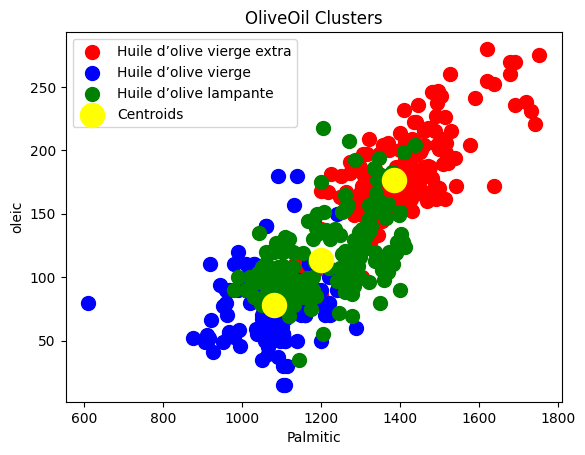

In [ ]:
# Extract the features for clustering
features = df.iloc[:, 2:].values
print(features)

# Perform k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(features)

# Add the cluster labels to the DataFrame
df['Cluster'] = labels
#delete area and region fields
df = df.drop(['macro.area', 'region'], axis=1)

# Visualize the clusters
plt.scatter(features[labels==0, 0], features[labels==0, 1], s=100, c='red', label='Huile d’olive vierge extra')
plt.scatter(features[labels==1, 0], features[labels==1, 1], s=100, c='blue', label='Huile d’olive vierge')
plt.scatter(features[labels==2, 0], features[labels==2, 1], s=100, c='green', label='Huile d’olive lampante')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('OliveOil Clusters')
plt.xlabel('Palmitic')
plt.ylabel('oleic')
plt.legend()
plt.show()

In [ ]:
# Save the clustered dataset as a new CSV file
pathClustered="/content/drive/MyDrive/Dataset/clusteredoliveoil.csv"
df.to_csv(pathClustered, index=False)

# **Data pre-processing**

In [ ]:
df = pd.read_csv(pathClustered)

# Split the dataset into training and testing sets
X = df.iloc[:, :-1].values # Features
y = df.iloc[:, -1].values # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Naïve Bayesian:**
C'est un type de classification bayésienne probabiliste simple basée sur le théorème de Bayes avec une forte indépendance (dite naïve) des hypothèses. Elle met en œuvre un classifieur bayésien naïf, ou classifieur naïf de Bayes, appartenant à la famille des classifieurs linéaires.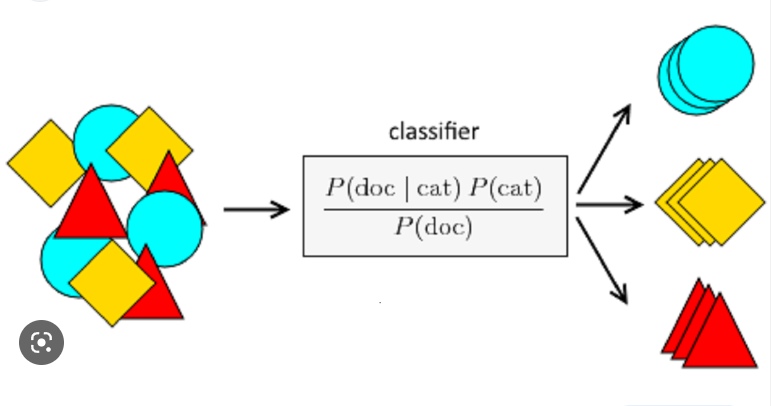

In [ ]:
#create the model/precision table
model_precision = pd.DataFrame(columns=['Algorithm', 'precision'])


# Fit a Naive Bayes classifier to the training data
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
print("y_test:",y_test)

print("y_pred",y_pred)
# Calculate the precision of the model
precision = precision_score(y_test, y_pred, average='weighted')

print("Naive bayes Precision:", precision)


model_precision = model_precision.append({'Algorithm': 'Naive bayes', 'precision': precision, }, ignore_index=True)
print(model_precision)

y_test: [1 2 0 2 1 0 0 2 0 2 1 0 1 1 2 0 0 0 0 0 2 1 2 2 1 2 0 1 0 2 0 1 1 1 0 2 1
 0 1 2 0 1 2 0 0 0 0 1 0 1 2 2 0 0 0 2 2 2 2 0 2 1 2 2 0 1 2 2 0 2 2 1 2 1
 0 1 2 0 0 2 0 0 0 0 0 1 1 1 1 1 2 1 2 1 0 0 1 0 0 0 1 0 2 2 1 2 1 0 1 0 2
 0 1 2 2]
y_pred [1 2 0 2 1 0 0 2 0 0 1 0 2 1 1 0 0 0 0 2 2 1 2 2 1 2 0 1 0 2 0 1 1 1 0 2 1
 0 1 0 0 1 2 0 0 0 0 1 0 1 2 2 0 0 0 2 0 2 2 2 2 1 1 1 0 1 0 2 0 2 2 1 2 1
 0 1 2 2 0 2 0 0 0 0 0 1 1 1 1 1 0 1 2 1 0 0 1 0 0 0 1 0 2 2 1 2 1 0 1 0 2
 0 1 2 2]
Naive bayes Precision: 0.8947757346623132
     Algorithm  precision
0  Naive bayes   0.894776


<ipython-input-59-a6d7ce9f5ec0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_precision = model_precision.append({'Algorithm': 'Naive bayes', 'precision': precision, }, ignore_index=True)


# **Nearest Neighbors (-NN)**
 l'algorithme des k plus proches voisins (k-NN) est une méthode non paramétrique utilisée pour la classification et la régression. Dans les deux cas, il s'agit de classer l'entrée dans la catégorie à laquelle appartient les k plus proches voisins dans l'espace des caractéristiques identifiées par apprentissage. Le résultat dépend si l'algorithme est utilisé à des fins de classification ou de régression
 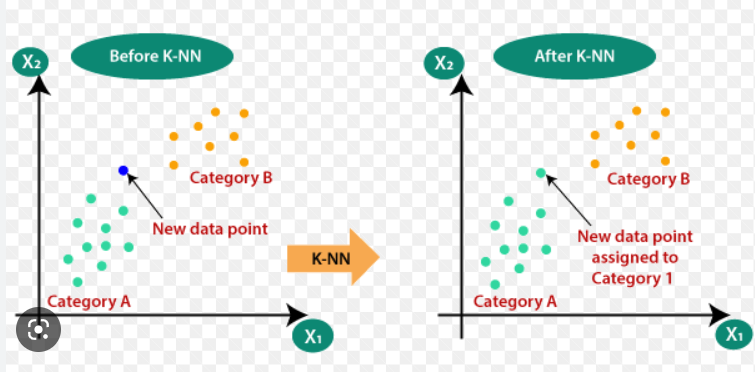

In [ ]:


# Define the list of possible k values to test
k_values = range(1, 20)
# Perform 5-fold cross-validation for each k value
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    cv_scores.append(scores.mean())

# Find the k value with the highest cross-validation score
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print("Optimal k: ", optimal_k)
# Create a K-NN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=optimal_k)
# Train the model on the training set
knn.fit(X_train, y_train)
# Make predictions on the test set
y_pred = knn.predict(X_test)
print("y_test:",y_test)

print("y_pred",y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='macro')

print("Nearest Neighbors Precision:", precision)
model_precision = model_precision.append({'Algorithm': 'Nearest Neighbors', 'precision': precision, }, ignore_index=True)
print(model_precision)

Optimal k:  18
y_test: [1 2 0 2 1 0 0 2 0 2 1 0 1 1 2 0 0 0 0 0 2 1 2 2 1 2 0 1 0 2 0 1 1 1 0 2 1
 0 1 2 0 1 2 0 0 0 0 1 0 1 2 2 0 0 0 2 2 2 2 0 2 1 2 2 0 1 2 2 0 2 2 1 2 1
 0 1 2 0 0 2 0 0 0 0 0 1 1 1 1 1 2 1 2 1 0 0 1 0 0 0 1 0 2 2 1 2 1 0 1 0 2
 0 1 2 2]
y_pred [1 2 0 2 1 0 0 2 0 0 1 0 1 1 1 0 0 0 0 0 2 1 2 2 1 2 0 1 0 2 0 1 1 1 0 2 1
 0 1 0 0 1 2 0 0 0 0 1 0 1 2 2 0 0 0 2 0 0 2 2 2 1 1 1 0 1 0 2 0 2 2 1 2 1
 0 1 2 0 0 2 0 0 0 0 0 1 1 1 1 1 0 2 2 1 0 0 1 0 0 0 1 0 2 0 1 2 1 0 1 0 2
 0 1 1 2]
Nearest Neighbors Precision: 0.8934877734877734
           Algorithm  precision
0        Naive bayes   0.894776
1  Nearest Neighbors   0.893488


<ipython-input-60-153732491d0f>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_precision = model_precision.append({'Algorithm': 'Nearest Neighbors', 'precision': precision, }, ignore_index=True)


# **Linear Discriminate Analysis (LDA)**
techniques d’analyse discriminante prédictive. Il s’agit d’expliquer et de prédire l’appartenance d’un individu à une classe (groupe) prédéfinie à partir de ses caractéristiques mesurées à l’aide de variables prédictives.
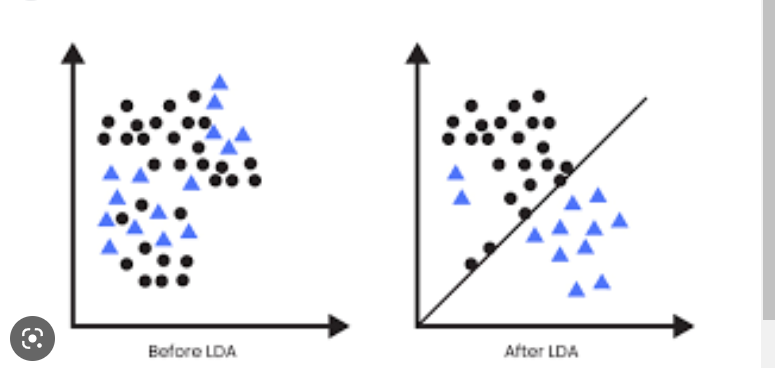

In [ ]:
# Fit the LDA model to the training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict the classes of the testing data using the trained LDA model
y_pred = lda.predict(X_test)

print("y_test:",y_test)

print("y_pred",y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='macro')

print("LDA Precision:", precision)

model_precision = model_precision.append({'Algorithm': 'Linear Discriminate Analysis', 'precision': precision, }, ignore_index=True)
print(model_precision)

y_test: [1 2 0 2 1 0 0 2 0 2 1 0 1 1 2 0 0 0 0 0 2 1 2 2 1 2 0 1 0 2 0 1 1 1 0 2 1
 0 1 2 0 1 2 0 0 0 0 1 0 1 2 2 0 0 0 2 2 2 2 0 2 1 2 2 0 1 2 2 0 2 2 1 2 1
 0 1 2 0 0 2 0 0 0 0 0 1 1 1 1 1 2 1 2 1 0 0 1 0 0 0 1 0 2 2 1 2 1 0 1 0 2
 0 1 2 2]
y_pred [1 2 0 2 1 0 0 2 0 0 1 0 1 1 1 0 0 0 0 0 2 1 2 2 1 2 0 1 0 2 0 1 1 1 0 2 1
 0 1 0 0 1 2 0 0 0 0 1 0 1 2 2 0 0 0 2 0 2 2 0 2 1 1 2 0 1 0 2 0 2 2 1 2 1
 0 1 2 2 0 2 0 0 0 0 0 1 1 1 1 1 2 1 2 1 0 0 1 0 0 0 1 0 1 2 1 2 1 0 1 0 2
 0 1 2 2]
LDA Precision: 0.9338514904746887
                      Algorithm  precision
0                   Naive bayes   0.894776
1             Nearest Neighbors   0.893488
2  Linear Discriminate Analysis   0.933851


<ipython-input-61-cf1459db11a8>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_precision = model_precision.append({'Algorithm': 'Linear Discriminate Analysis', 'precision': precision, }, ignore_index=True)


# **Decision Tree**
Un arbre de décision est un outil d'aide à la décision représentant un ensemble de choix sous la forme graphique d'un arbre. Les différentes décisions possibles sont situées aux extrémités des branches (les « feuilles » de l'arbre), et sont atteintes en fonction de décisions prises à chaque étape. 
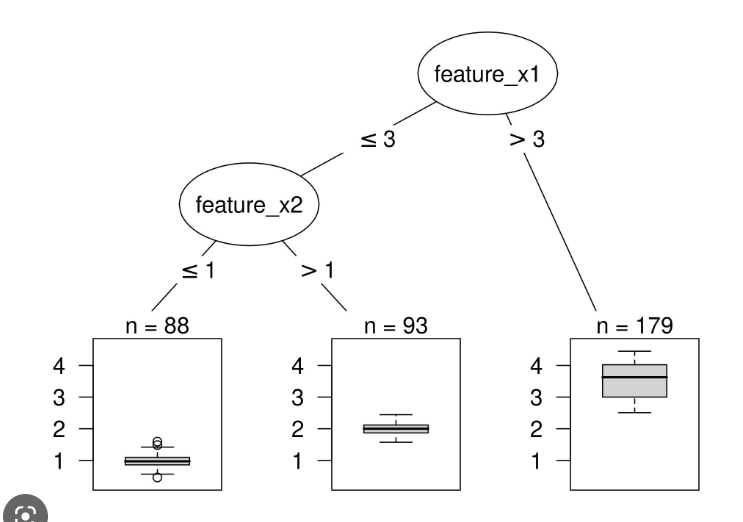

In [ ]:
# Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)
print("y_test:",y_test)

print("y_pred",y_pred)
# Calculate precision score
precision = precision_score(y_test, y_pred, average='weighted')
print("Decision Tree Precision:", precision)

model_precision = model_precision.append({'Algorithm': 'Decision Tree', 'precision': precision, }, ignore_index=True)
print(model_precision)


y_test: [1 2 0 2 1 0 0 2 0 2 1 0 1 1 2 0 0 0 0 0 2 1 2 2 1 2 0 1 0 2 0 1 1 1 0 2 1
 0 1 2 0 1 2 0 0 0 0 1 0 1 2 2 0 0 0 2 2 2 2 0 2 1 2 2 0 1 2 2 0 2 2 1 2 1
 0 1 2 0 0 2 0 0 0 0 0 1 1 1 1 1 2 1 2 1 0 0 1 0 0 0 1 0 2 2 1 2 1 0 1 0 2
 0 1 2 2]
y_pred [1 2 0 2 2 0 0 2 0 2 1 0 1 1 1 0 0 0 0 0 2 1 2 2 1 2 0 1 0 2 0 1 1 1 0 2 1
 0 1 2 0 1 2 0 0 0 0 1 0 1 2 2 0 0 0 2 0 2 2 0 2 1 2 2 0 1 0 2 0 2 2 1 2 1
 0 1 2 2 0 2 0 0 0 0 0 1 1 1 1 1 2 1 2 1 0 0 1 0 0 0 1 0 2 2 1 2 1 0 1 0 2
 0 1 2 2]
Decision Tree Precision: 0.956425120772947
                      Algorithm  precision
0                   Naive bayes   0.894776
1             Nearest Neighbors   0.893488
2  Linear Discriminate Analysis   0.933851
3                 Decision Tree   0.956425


<ipython-input-62-f59ccaac993a>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_precision = model_precision.append({'Algorithm': 'Decision Tree', 'precision': precision, }, ignore_index=True)


# **Artificial Neural Networks (ANN)**
Les réseaux de neurones artificiels (ANN) sont composés d'une couche de nœuds, contenant une couche d'entrée, une ou plusieurs couches cachées et une couche de sortie. Chaque nœud, ou neurone artificiel, se connecte à un autre et a un poids et un seuil associés. Si la sortie d'un nœud individuel est supérieure à la valeur de seuil spécifiée, ce nœud est activé, envoyant des données à la couche suivante du réseau. Sinon, aucune donnée n'est transmise à la couche suivante du réseau.
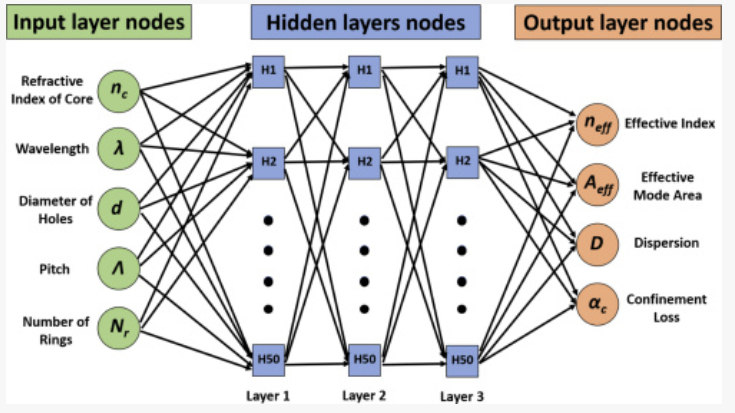

In [ ]:
# Train the ANN classifier with 2 hidden layers of 8 and 4 neurons respectively
mlp = MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = mlp.predict(X_test)

print("y_test:",y_test)

print("y_pred",y_pred)

# Compute the precision of the classifier
precision = precision_score(y_test, y_pred, average='macro')
print("Decision Tree Precision:", precision)

model_precision = model_precision.append({'Algorithm': 'Artificial Neural Networks', 'precision': precision, }, ignore_index=True)
print(model_precision)



y_test: [1 2 0 2 1 0 0 2 0 2 1 0 1 1 2 0 0 0 0 0 2 1 2 2 1 2 0 1 0 2 0 1 1 1 0 2 1
 0 1 2 0 1 2 0 0 0 0 1 0 1 2 2 0 0 0 2 2 2 2 0 2 1 2 2 0 1 2 2 0 2 2 1 2 1
 0 1 2 0 0 2 0 0 0 0 0 1 1 1 1 1 2 1 2 1 0 0 1 0 0 0 1 0 2 2 1 2 1 0 1 0 2
 0 1 2 2]
y_pred [1 2 0 2 1 0 0 2 0 0 1 0 1 1 2 0 0 0 0 0 2 1 2 2 1 2 0 1 0 2 0 1 1 1 0 2 1
 0 1 2 0 1 2 0 0 0 0 1 0 1 2 2 0 0 0 2 2 2 2 2 2 1 2 2 0 1 0 2 0 2 2 1 2 1
 0 1 2 2 0 2 0 0 0 0 0 1 1 1 1 1 2 1 2 1 0 0 1 0 0 0 1 0 2 2 1 2 1 0 1 0 2
 0 1 2 2]
Decision Tree Precision: 0.9668304668304669
                      Algorithm  precision
0                   Naive bayes   0.894776
1             Nearest Neighbors   0.893488
2  Linear Discriminate Analysis   0.933851
3                 Decision Tree   0.956425
4    Artificial Neural Networks   0.966830


<ipython-input-63-e284c314558e>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_precision = model_precision.append({'Algorithm': 'Artificial Neural Networks', 'precision': precision, }, ignore_index=True)


# **Support Vector Machine (SVM)**
Les SVMs sont une famille d’algorithmes d‘apprentissage automatique qui permettent de résoudre des problèmes tant de classification que de régression ou de détection d’anomalie. Ils sont connus pour leurs solides garanties théoriques, leur grande flexibilité ainsi que leur simplicité d’utilisation même sans grande connaissance de data mining.




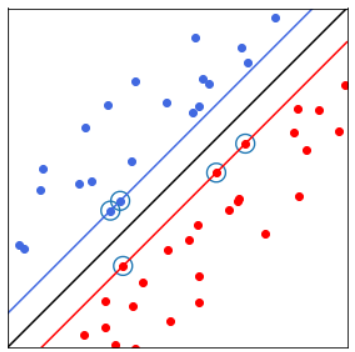

Dans cet espace à deux dimensions, la « frontière » est la droite noire, les « vecteurs de support » sont les points entourés (les plus proche de la frontière) et la « marge » est la distance entre la frontière et les droites bleue et rouge.

 

Cette notion de frontière  suppose que  les données soient linéairement séparables, ce qui est rarement le cas. Pour y pallier, les SVMs reposent souvent sur l’utilisation de « noyaux ». Ces fonctions mathématiques permettent de séparer les données en les projetant dans un feature space (un espace vectoriel de plus grande dimension, voir figure ci-dessous). La technique de maximisation de marge permet, quant à elle, de garantir une meilleure robustesse face au bruit – et donc un modèle plus généralisable.

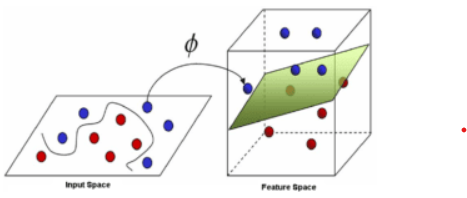


**Les SVMs permettent de projeter les données dans une espace de plus grande dimension via une fonction noyau pour les séparer linéairement. **


In [ ]:
# Train a Support Vector Machine (SVM) classifier with a radial basis function kernel
svm = SVC(kernel='rbf', gamma='scale', C=1)
svm.fit(X_train, y_train)

# Predict the classes of the testing set
y_pred = svm.predict(X_test)

print("y_test:",y_test)

print("y_pred",y_pred)
# Calculate precision score
precision = precision_score(y_test, y_pred, average='weighted')
print("Decision Tree Precision:", precision)

model_precision = model_precision.append({'Algorithm': 'Support Vector Machine (SVM)', 'precision': precision, }, ignore_index=True)
print(model_precision)



y_test: [1 2 0 2 1 0 0 2 0 2 1 0 1 1 2 0 0 0 0 0 2 1 2 2 1 2 0 1 0 2 0 1 1 1 0 2 1
 0 1 2 0 1 2 0 0 0 0 1 0 1 2 2 0 0 0 2 2 2 2 0 2 1 2 2 0 1 2 2 0 2 2 1 2 1
 0 1 2 0 0 2 0 0 0 0 0 1 1 1 1 1 2 1 2 1 0 0 1 0 0 0 1 0 2 2 1 2 1 0 1 0 2
 0 1 2 2]
y_pred [1 2 0 2 1 0 0 2 0 0 1 0 1 1 1 0 0 0 0 0 2 1 2 2 1 2 0 1 0 2 0 1 1 1 0 2 1
 0 1 0 0 1 2 0 0 0 0 1 0 1 2 2 0 0 0 2 0 2 2 2 2 1 1 1 0 1 0 2 0 2 2 1 2 1
 0 1 2 0 0 2 0 0 0 0 0 1 1 1 1 1 0 1 2 1 0 0 1 0 0 0 1 0 2 0 1 2 1 0 1 0 2
 0 1 2 2]
Decision Tree Precision: 0.9180837049759732
                      Algorithm  precision
0                   Naive bayes   0.894776
1             Nearest Neighbors   0.893488
2  Linear Discriminate Analysis   0.933851
3                 Decision Tree   0.956425
4    Artificial Neural Networks   0.966830
5  Support Vector Machine (SVM)   0.918084


<ipython-input-64-e9210e042c61>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_precision = model_precision.append({'Algorithm': 'Support Vector Machine (SVM)', 'precision': precision, }, ignore_index=True)
